In [8]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt


import flowjax
from flowjax.bijections import Affine, Chain, Invert, RationalQuadraticSpline, Tanh
from flowjax.bijections.utils import Identity, Reshape
from flowjax.distributions import Normal, Transformed, Uniform, AbstractTransformed, AbstractDistribution, _StandardUniform, AbstractBijection
from flowjax.flows import masked_autoregressive_flow, coupling_flow
from flowjax.train import fit_to_data
from flowjax._custom_types import ArrayLike
from flowjax.wrappers import NonTrainable, Where
from typing import ClassVar
import equinox as eqx
from flowjax.masks import rank_based_mask
from collections.abc import Callable
import jax.nn as jnn

from flowjax.distributions import Transformed, Uniform, _StandardUniform
from flowjax.flows import masked_autoregressive_flow
from flowjax.train import fit_to_data
from flowjax.bijections.utils import Identity
from flowjax.wrappers import NonTrainable
from flowjax.bijections import (
    Affine,
    Invert,
    MaskedAutoregressive,
    RationalQuadraticSpline,
    Stack,
    Tanh,
    Identity
)

seed = 1

In [9]:
import flowjax
import jax
import jax.numpy as jnp
from jax import random
from frugal_flows.bijections import UnivariateNormalCDF

# Set the random seed
key = random.PRNGKey(0)

# Generate N Bernoulli samples
N = 1000
p = 0.5
x = jr.bernoulli(key, p=0., shape=(N, 1))
# x = random.normal(key, shape=(N,1))
# Calculate y conditional on x
mean = 2 * x
mean = 2
std_dev = 1
y = random.normal(key, shape=(N,1)) * std_dev + mean

In [12]:
nvars = 1
key, subkey = jr.split(jr.PRNGKey(seed))

base_dist = flowjax.distributions._StandardUniform((1,))

# base_dist = Uniform(-jnp.zeros(nvars), jnp.ones(nvars))
marginal_transform = Stack([UnivariateNormalCDF(
    ate=5., 
    const=3., 
    scale=3., 
    # cond_dim=1
)])
flow = Transformed(base_dist, Invert(marginal_transform))

key, subkey = jr.split(key)

# Train 
flow, losses = fit_to_data(
    key=subkey,
    dist=flow,
    x=y,
    # condition=x,
    learning_rate=1e-2,
    max_patience=20,
    max_epochs=700,
)

  6%|█▊                             | 42/700 [00:00<00:04, 132.78it/s, train=1.3922344, val=1.429175 (Max patience reached)]


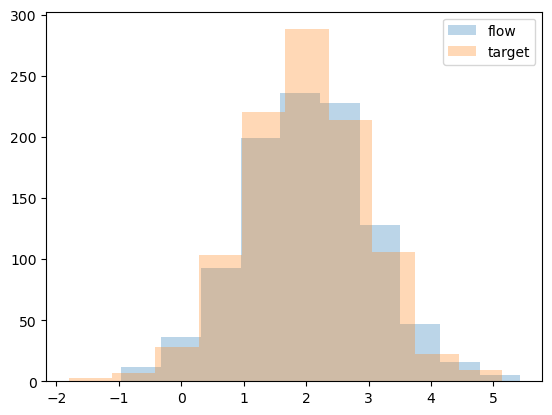

In [13]:
# plt.hist(*flow.sample(key, (1000, ), condition=jnp.zeros(1)).T, label="flow", alpha=0.3)
plt.hist(*flow.sample(key, (1000, ), condition=jnp.zeros(1)).T,label="flow", alpha=0.3)

# plt.hist(*flow.sample(key, (1000, ), condition=jnp.zeros(1)).T, label="flow", alpha=0.3)
plt.hist(*y[:1000].T, label="target", alpha=0.3)
plt.legend()

In [14]:
print(flow.bijection.bijection.bijections[0].ate)
print(flow.bijection.bijection.bijections[0].const)
print(flow.bijection.bijection.bijections[0].scale)

0
1.9952294
0.9925515
